<h1 align="center"><font size="5">RECURRENT NETWORKS IN DEEP LEARNING</font></h1>
<h2 align="center"><font size="5">Long Short-Term Memory (LSTM) modelling</font></h2>

Created on JupyterLab

Hello and welcome to this notebook. In this notebook, we will go over concepts of the Long Short-Term Memory (LSTM) model, a refinement of the original Recurrent Neural Network model. By the end of this notebook, you should be able to understand the Long Short-Term Memory model, the benefits and problems it solves, and its inner workings and calculations.

<h2>RECURRENT NETWORKS IN DEEP LEARNING</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. Learn Long Short-Term Memory Model</h5>
<h5> 2. Stacked LTSM </h5>



<br>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#long_short_term_memory_model">Long Short-Term Memory Model</a></li>
    <li><a href="#ltsm">LTSM</a></li>
    <li><a href="#stacked_ltsm">Stacked LTSM</a></li>
</ol>
<p></p>
</div>
<br>

<hr>


<a id="intro"><a/> 

<h2>Introduction</h2>

Recurrent Neural Networks are Deep Learning models with simple structures and a feedback mechanism built-in, or in different words, the output of a layer is added to the next input and fed back to the same layer.

The Recurrent Neural Network is a specialized type of Neural Network that solves the issue of **maintaining context for Sequential data** -- such as Weather data, Stocks, Genes, etc. At each iterative step, the processing unit takes in an input and the current state of the network, and produces an output and a new state that is <b>re-fed into the network.


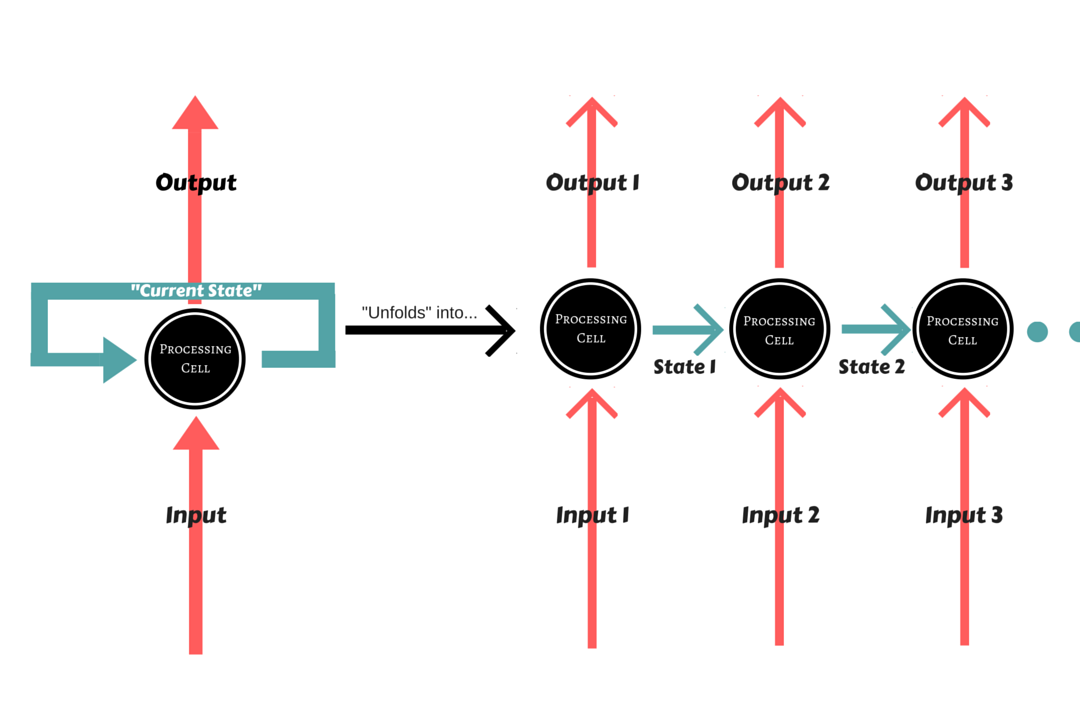

<center><i>Representation of a Recurrent Neural Network</i></center>

Imagine that the RNN were using has only one hidden layer, the first data point flows into the network as input data, denoted as X. As we mentioned before, the hidden units also received the previous state, or the context, denoted as "H previous", along with the input. 

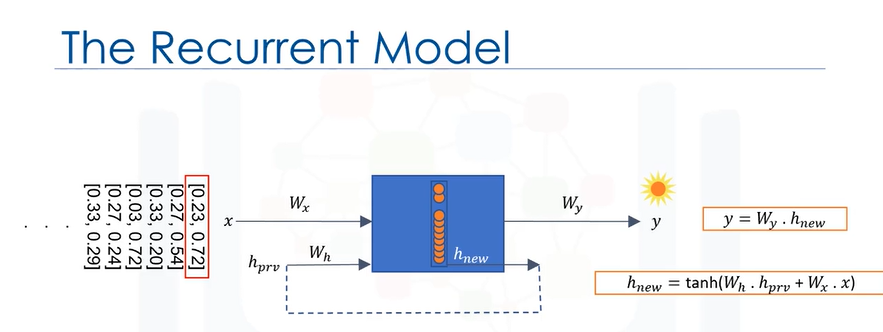


Then in the hidden layer, two values will be calculated, first the new or updated state, denoted as *H new*, is to be used for the next data point in the sequence. And second, the output of the network will be computed, which is denoted as *y*. The new state is a function of the previous state and the input data as shown here.

If this is the first data point then some form of initial state is used, which will differ depending on the type of data being analyzed, but typically it is initialized to all zeros. Please notice that*Wx* in this equation is the weight matrix between the input and the hidden unit, and *Wh* are the weights that are multiplied by the previously hidden state in the equation. The output of the hidden unit is simply calculated by multiplication of the new hidden state and the output weight matrix. 

So after processing the first data point in addition to the output, a new context is generated that represents the most recent point. Then this context is fed back into the net with the next data point, and we repeat these steps until all the data is processed.

**However, <b>this model has some problems</b>. It's very computationally expensive to maintain the state for a large amount of units, even more so over a long amount of time. Additionally, Recurrent Networks are very sensitive to changes in their parameters. As such, they are prone to different problems with their Gradient Descent optimizer -- they either grow exponentially (Exploding Gradient) or drop down to near zero and stabilize (Vanishing Gradient), both problems that greatly harm a model's learning capability.**

To solve these problems, Hochreiter and Schmidhuber published a paper in 1997 describing a way to keep information over long periods of time and additionally solve the oversensitivity to parameter changes, i.e., make backpropagating through the Recurrent Networks more viable. This proposed method is called Long Short-Term Memory (LSTM).

<a id="long_short_term_memory_model"></a>

<h2>Long Short-Term Memory Model</h2>

The Long Short-Term Memory, as it was called, was an abstraction of how computer memory works. It is "bundled" with whatever processing unit is implemented in the Recurrent Network, although outside of its flow, and is responsible for keeping, reading, and outputting information for the model. 

**The way it works is simple: you have a linear unit, which is the information cell itself, surrounded by three logistic gates responsible for maintaining the data. One gate is for inputting data into the information cell, one is for outputting data from the input cell, and the last one is to keep or forget data depending on the needs of the network.**

Thanks to that, it not only solves the problem of keeping states, because the network can choose to forget data whenever information is not needed, **it also solves the gradient problems, since the Logistic Gates have a very nice derivative.**

<h3>Long Short-Term Memory Architecture</h3>

The Long Short-Term Memory is composed of a linear unit surrounded by three logistic gates. The name for these gates vary from place to place, but the most usual names for them are:

<ul>
    <li>the "Input" or "Write" Gate, which handles the writing of data into the information cell </li>
    <li>the "Output" or "Read" Gate, which handles the sending of data back onto the Recurrent Network</li>
    <li>the "Keep" or "Forget" Gate, which handles the maintaining and modification of the data stored in the information cell</li>
</ul>
<br>

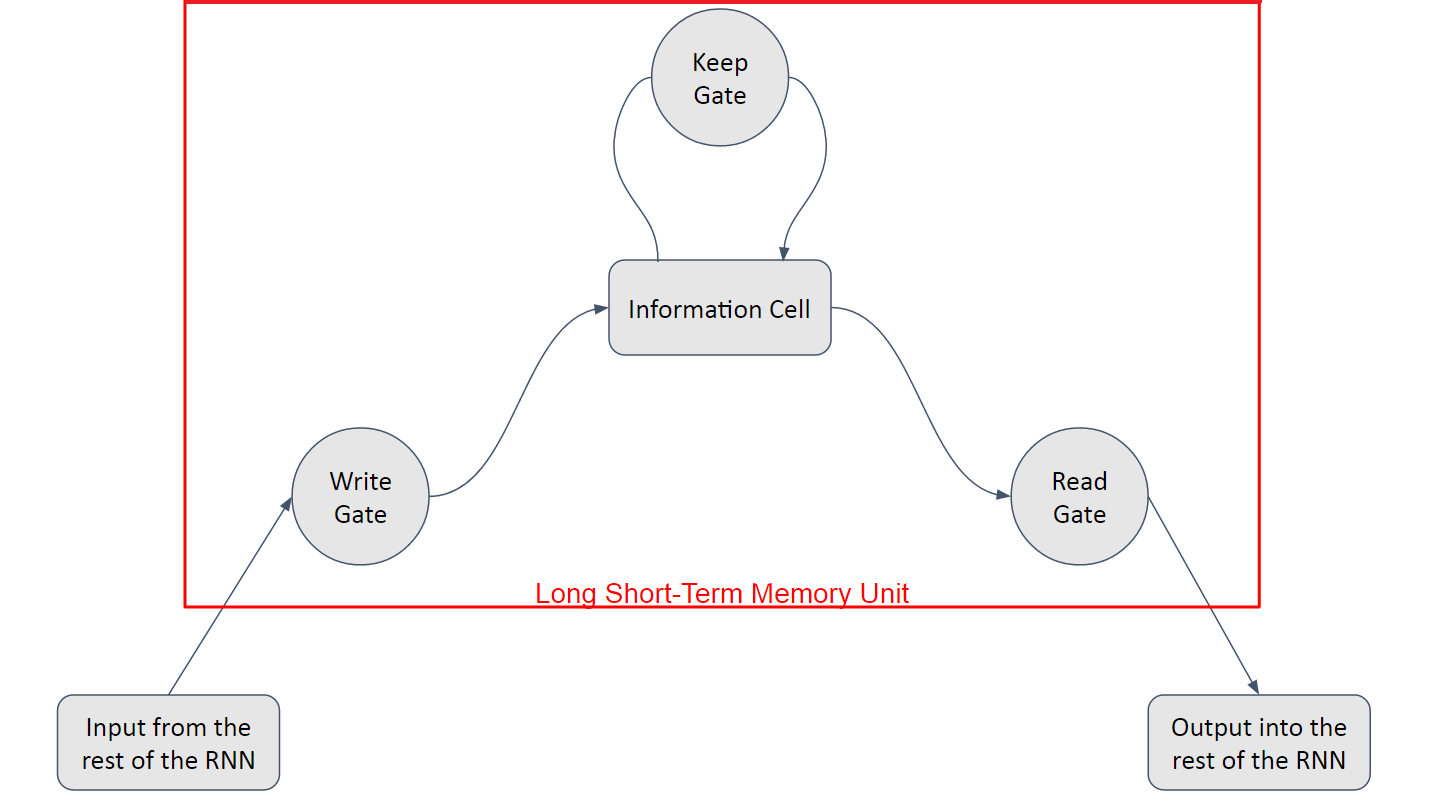

<center><i>Diagram of the Long Short-Term Memory Unit</i></center>
<br><br>
The three gates are the centerpiece of the LSTM unit. The gates, when activated by the network, perform their respective functions. For example, the Input Gate will write whatever data it is passed into the information cell, the Output Gate will return whatever data is in the information cell, and the Keep Gate will maintain the data in the information cell. These gates are analog and multiplicative, and as such, can modify the data based on the signal they are sent.

<hr>

For example, an usual flow of operations for the LSTM unit is as such: **First off, the Keep Gate has to decide whether to keep or forget the data currently stored in memory. It receives both the input and the state of the Recurrent Network, and passes it through its Sigmoid activation.** If $K
_t$ has value of 1 means that the LSTM unit should keep the data stored perfectly and if $K_t$ a value of 0 means that it should forget it entirely. Consider $S_{t-1}$ as the incoming (previous) state, $x_t$ as the incoming input, and $W_k$, $B_k$ as the weight and bias for the Keep Gate. Additionally, consider $Old_{t-1}$ as the data previously in memory. What happens can be summarized by this equation:

<br>

<font size="4"><strong>
$$K_t = \sigma(W_k \times [S_{t-1}, x_t] + B_k)$$

$$Old_t = K_t \times Old_{t-1}$$
</strong></font>

<br>

As you can see, $Old\_{t-1}$ was multiplied by value was returned by the Keep Gate($K_t$) -- this value is written in the memory cell.

<br>
Then, the input and state are passed on to the **Input Gate**, in which there is another Sigmoid activation applied. Concurrently, the input is processed as normal by whatever processing unit is implemented in the network, and then multiplied by the Sigmoid activation's result $I_t$, much like the Keep Gate. Consider $W_i$ and $B_i$ as the weight and bias for the Input Gate, and $C_t$ the result of the processing of the inputs by the Recurrent Network.
<br><br>

<font size="4"><strong>
$$I_t = \sigma (W_i \times [S_{t-1},x_t]+B_i)$$

$$New_t = I_t \times C_t$$
</strong></font>

<br>
$New_t$ is the new data to be input into the memory cell. This is then <b>added</b> to whatever value is still stored in memory.
<br><br>

<font size="4"><strong>
$$Cell_t = Old_t + New_t$$
</strong></font>

<br>
We now have the <i>candidate data</i> which is to be kept in the memory cell. **The conjunction of the Keep and Input gates work in an analog manner, making it so that it is possible to keep part of the old data and add only part of the new data.** Consider however, what would happen **if the Forget Gate was set to 0 and the Input Gate was set to 1**:
<br><br>

<font size="4"><strong>
$$Old_t = 0 \times Old_{t-1}$$

$$New_t = 1 \times C_t$$

$$Cell_t = C_t$$
</strong></font>


**The old data would be totally forgotten and the new data would overwrite it completely.**

The **Output Gate functions in a similar manner.** **To decide what we should output, we take the input data and state and pass it through a Sigmoid function as usual. The contents of our memory cell, however, are pushed onto a <i>Tanh</i> function to bind them between a value of -1 to 1.** Consider $W_o$ and $B_o$ as the weight and bias for the Output Gate.
<br>
<font size="4"><strong>
$$O_t = \sigma (W_o \times [S_{t-1},x_t] + B_o)$$

$$Output_t = O_t \times tanh(Cell_t)$$
</strong></font>
<br>

**And that $Output_t$ is what is output into the Recurrent Network.**

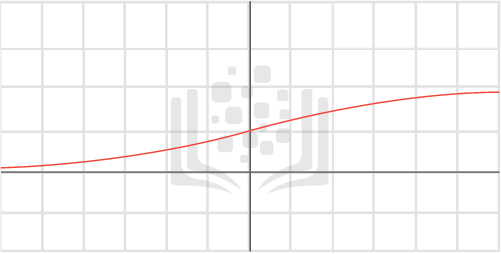
<center><i>The Logistic Function plotted</i></center>
<br><br>

As mentioned many times, all three gates are logistic. The reason for this is because it is very easy to backpropagate through them, and as such, it is possible for the model to learn exactly how it is supposed to use this structure. This is one of the reasons for which LSTM is a very strong structure. Additionally, this solves the gradient problems by being able to manipulate values through the gates themselves -- by passing the inputs and outputs through the gates, we have now a easily derivable function modifying our inputs.

In regards to the problem of storing many states over a long period of time, LSTM handles this perfectly by only keeping whatever information is necessary and forgetting it whenever it is not needed anymore. Therefore, LSTMs are a very elegant solution to both problems.

LSTM maintains a strong gradient over many time steps. This means you can train an LSTM with relatively long sequences. 

The original LSTM model has only one single hidden LSTM layer, but as you know, in cases of simple Feedforward Neural Networks, we usually stack layers to create hierarchical feature representation of the input data. So does this also apply to LSTMs? What if we want to have an RNN with stacked LSTM. For example, a two layer LSTM. 

In this case, **the output of the first layer will feed as the input to the second layer.** Then, the second LSTM blends it with its own internal state to produce an output. Stacking an LSTM allows for greater model complexity. **So the second LSTM can create a more complex feature representation of the current input.** That is, stacking LSTM hidden layers makes the model deeper, and most probably leads to more accurate results.

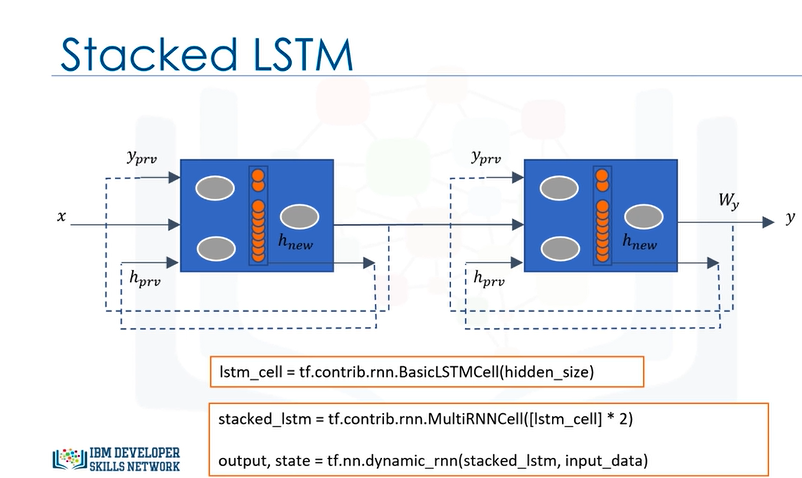

Now, let's see what happens during the **training process.** **The network learns to determine how much old information to forget through the forget gate.** So, the weights denoted as *WF*, and biases denoted as *BF*, will be learned through the training procedure. We also determine how much new information called X, to incorporate through the input gate and its weights. We also calculate the new cell state based on the current and the previous internal state, so the network has to learn is corresponding weights and biases. Finally, we determine how much of our cell state we want to output an output gate. **Basically, the network is learning the weights and biases used in each gate for each layer.**

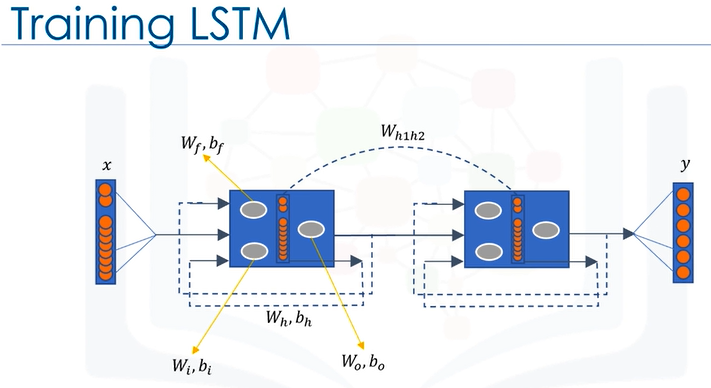

<a id="instructions"><a/> 

<h2>Instructions</h2>
    
We start by installing everything we need for this exercise:


In [1]:
#!pip install grpcio==1.24.3
#!pip install tensorflow==2.9.0

<a id="ltsm"></a>

<h2>LSTM</h2>
Lets first create a tiny LSTM network sample to understand the architecture of LSTM networks.


We need to import the necessary modules for our code. We need <b><code>numpy</code></b> and <b><code>tensorflow</code></b>, obviously. Additionally, we can import directly the <b><code>tensorflow.keras.layers</code></b> , which includes the function for building RNNs.


In [2]:
import numpy as np
import tensorflow as tf
if not tf.__version__ == '2.9.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.9.0, or restart your Kernel (Kernel->Restart & Clear Output)')

2024-05-23 11:18:52.477304: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 11:18:52.497956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-23 11:18:52.498005: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


IMPORTANT! => Please restart the kernel by clicking on "Kernel"->"Restart and Clear Outout" and wait until all output disapears. Then your changes are beeing picked up


We want to create a network that has only one LSTM cell. We have to pass 2 elements to LSTM, the <b>prv_output</b> and <b>prv_state</b>, so called, <b>h</b> and <b>c</b>. Therefore, we initialize a state vector, <b>state</b>.  Here, <b>state</b> is a tuple with 2 elements, each one is of size [1 x 4], one for passing prv_output to next time step, and another for passing the prv_state to next time stamp.


In [3]:
LSTM_CELL_SIZE = 4  # output size (dimension), which is same as hidden size in the cell

state = (tf.zeros([1,LSTM_CELL_SIZE]),)*2
state

2024-05-23 11:18:58.879969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-23 11:18:58.880031: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-23 11:18:58.880078: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-mathildeduvi): /proc/driver/nvidia/version does not exist
2024-05-23 11:18:58.880547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>)

In [4]:
lstm = tf.keras.layers.LSTM(LSTM_CELL_SIZE, return_sequences=True, return_state=True)

lstm.states=state

print(lstm.states)


(<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[0., 0., 0., 0.]], dtype=float32)>)


As we can see, the states has 2 parts, the new state c, and also the output h. Lets check the output again:


Let define a sample input. In this example, batch_size = 1, and  features = 6:


In [5]:
#Batch size x time steps x features.
sample_input = tf.constant([[3,2,2,2,2,2]],dtype=tf.float32)

batch_size = 1
sentence_max_length = 1
n_features = 6

new_shape = (batch_size, sentence_max_length, n_features)

inputs = tf.constant(np.reshape(sample_input, new_shape), dtype = tf.float32)

Now, we can pass the input to lstm_cell, and check the new state:


In [6]:
output, final_memory_state, final_carry_state = lstm(inputs)


In [7]:
print('Output : ', tf.shape(output))

print('Memory : ',tf.shape(final_memory_state))

print('Carry state : ',tf.shape(final_carry_state))

Output :  tf.Tensor([1 1 4], shape=(3,), dtype=int32)
Memory :  tf.Tensor([1 4], shape=(2,), dtype=int32)
Carry state :  tf.Tensor([1 4], shape=(2,), dtype=int32)


<hr>
<a id="stacked_ltsm"></a>
<h2>Stacked LSTM</h2>
What about if we want to have a RNN with stacked LSTM? For example, a 2-layer LSTM. In this case, the output of the first layer will become the input of the second.


Lets create the stacked LSTM cell:


In [8]:
cells = []

Creating the first layer LTSM cell.


In [9]:
LSTM_CELL_SIZE_1 = 4 #4 hidden nodes
cell1 = tf.keras.layers.LSTMCell(LSTM_CELL_SIZE_1)
cells.append(cell1)

Creating the second layer LTSM cell.


In [10]:
LSTM_CELL_SIZE_2 = 5 #5 hidden nodes
cell2 = tf.keras.layers.LSTMCell(LSTM_CELL_SIZE_2)
cells.append(cell2)

To create a multi-layer LTSM we use the <b>tf.keras.layers.StackedRNNCells</b> function, it takes in multiple single layer LTSM cells to create a multilayer stacked LTSM model.


In [11]:
stacked_lstm =  tf.keras.layers.StackedRNNCells(cells)

Now we can create the RNN from <b>stacked_lstm</b>:


In [12]:
lstm_layer= tf.keras.layers.RNN(stacked_lstm ,return_sequences=True, return_state=True)

Lets say the input sequence length is 3, and the dimensionality of the inputs is 6. The input should be a Tensor of shape: [batch_size, max_time, dimension], in our case it would be (2, 3, 6)


In [13]:
#Batch size x time steps x features.
sample_input = [[[1,2,3,4,3,2], [1,2,1,1,1,2],[1,2,2,2,2,2]],[[1,2,3,4,3,2],[3,2,2,1,1,2],[0,0,0,0,3,2]]]
sample_input

batch_size = 2
time_steps = 3
features = 6
new_shape = (batch_size, time_steps, features)

x = tf.constant(np.reshape(sample_input, new_shape), dtype = tf.float32)

we can now send our input to network, and check the output:


In [14]:
output, final_memory_state, final_carry_state  = lstm_layer(x)

In [15]:
print('Output : ', tf.shape(output))

print('Memory : ',tf.shape(final_memory_state))

print('Carry state : ',tf.shape(final_carry_state))

Output :  tf.Tensor([2 3 5], shape=(3,), dtype=int32)
Memory :  tf.Tensor([2 2 4], shape=(3,), dtype=int32)
Carry state :  tf.Tensor([2 2 5], shape=(3,), dtype=int32)


As you see, the output is of shape (2, 3, 5), which corresponds to our 2 batches, 3 elements in our sequence, and the dimensionality of the output which is 5.

<hr>


# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

-------------------------------------------------------------------------------------------------------------------------------------------

Author:  <a href = "https://linkedin.com/in/saeedaghabozorgi"> Saeed Aghabozorgi </a>, <a href="https://br.linkedin.com/in/walter-gomes-de-amorim-junior-624726121?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01">Walter Gomes de Amorim Junior</a>

Updated to TF 2.X by <a href="https://linkedin.com/in/romeo-kienzler-089b4557?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Romeo Kienzler </a>, <a href="https://www.linkedin.com/in/samaya-madhavan?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01"> Samaya Madhavan </a>


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


<hr>

Copyright © 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork-20629446&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
